## K-means on a randomly generated dataset

### Importing

In [13]:
import numpy as np 
%matplotlib inline

### Random dataset

In [12]:
from sklearn.datasets._samples_generator import make_blobs


np.random.seed(0)

X, Y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

### Scatter plot

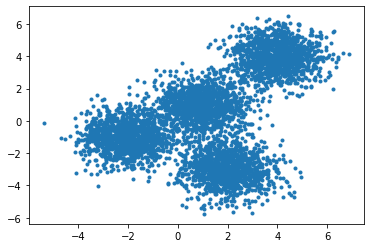

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

### Model: K-Means

In [14]:
from sklearn.cluster import KMeans 

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Fitting

In [6]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Labels

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

Cluster centres

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

### Visual Plot

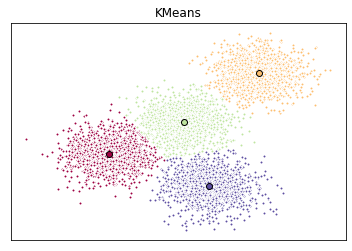

In [15]:
import matplotlib.pyplot as plt 

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
